# Commerce / Marketing Data Analyst Preview Test - Basic

```
0. Background
●	현재는 2014년 3월, 000님은 가상의 온라인 커머스 기업의 데이터 분석가로 해당 서비스의 데이터 분석을 진행하려고 합니다.
●	과제 데이터는 아래와 같이 구성이 되어 있습니다.
●	데이터 스키마
```

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm

warnings.filterwarnings('ignore')

os.chdir("/Users/skyoo/OneDrive/바탕 화면/EXPORT/Ecommerce/data")
os.getcwd()

'c:\\Users\\skyoo\\OneDrive\\바탕 화면\\EXPORT\\Ecommerce\\data'

In [2]:
Customer = pd.read_csv('Customer.csv')
Transactions = pd.read_csv('Transactions.csv')
prod_cat_info = pd.read_csv('prod_cat_info.csv')

# 1. Data Preprocessing & Exploratory Data Analysis
```
●	2011년 시점을 기준으로 5세 단위로 연령 구간을 나누고 각 성별(gender), 연령 구간별로 고객 수를 Python 코드를 이용하여 집계해 주세요. (단, 고객의 성별, 연령 정보를 구할 수 없을 경우 해당 데이터는 집계에서 제외해 주세요.)
●	위에서 집계한 데이터를 기준으로 연령/성별 통계를 확인할 수 있는 데이터 시각화 자료를 작성해주세요.
●	2013년 2월 28일을 기준으로 각 고객의 구매 경과일수 및 구매주기를 구해주세요.
    ○	구매 경과일수 = 기준일 - 마지막 구매일
    ○	구매주기 = (마지막 구매일 - 첫 구매일)/(총 구매 일수 - 1)
●	위에서 구한 결과에 고객의 연령, 연령 구간, 성별 정보를 결합하여 특정 연령 구간, 성별 간 차이가 있는지 확인해주세요.
●	위에서 구한 고객별 구매 경과일수를 기준으로 구매 경과일수가 30일 이상인 고객을 대상으로 재구매 유도를 위한 캠페인을 진행하였다고 가정하겠습니다. 캠페인 2013년 12월 31일까지 구매 반응한 고객 수를 구해주세요.
●	전체 데이터에서 고객의 요일별 구매 건수 차이가 있는지 확인해주세요.
●	대 카테고리를 기준으로 2011년부터 2013년 월평균 매출액이 가장 높은 카테고리는 무엇인가요?
●	각 카테고리별 월평균 매출액의 분산과 표준 편차를 구해주세요.
●	각 카테고리에 대한 월평균 매출액과 표준 편차를 통해 현재 해당 서비스에서의 각 카테고리별 매출 성과를 판단해주세요.

```

## Preprocessing

### Customer
```
○	Customer.csv : 고객의 인적 정보를 담고 있는 데이터 (고객id, 생년월일, 성별, 거주지 코드)
■	customer_id : 고객id (고객 식별 값, 보통 고유함)
■	DOB : 고객 생년월일 (날짜 형식 데이터)
■	Gender : 고객 성별 (M : 남성 / F : 여성)
■	city_code : 거주지 코드 (1부터 10까지 숫자로 구성)
```

In [3]:
Customer.info() #shape (5647,4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [4]:
Customer.head() #DOB object이므로 datetime으로 바꿀것

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [5]:
Customer.describe()

,customer_Id,city_code
count,5647.000000,5645.000000
mean,271037.281034,5.472631
std,2451.261711,2.859918
min,266783.000000,1.000000
25%,268912.000000,3.000000
50%,271028.000000,5.000000
75%,273180.000000,8.000000
max,275265.000000,10.000000


In [6]:
Customer.describe(exclude='number')

,DOB,Gender
count,5647,5645
unique,4056,2
top,27-12-1988,M
freq,7,2892


In [7]:
Customer.isnull().sum() #Gender, city_code에 Null 2개씩 존재

customer_Id    0
DOB            0
Gender         2
city_code      2
dtype: int64

In [8]:
Customer[Customer.isnull().any(axis=1)] # 1970년생,  customer_id 26xxxx or 27xxxx

,customer_Id,DOB,Gender,city_code
24,267199,14-02-1970,NaN,2.0
87,271626,02-06-1970,NaN,6.0
115,268447,14-07-1970,M,NaN
149,268709,09-09-1970,F,NaN


In [9]:
Customer['city_code'].unique()

array([ 4.,  8.,  2.,  1.,  5.,  9.,  7., 10.,  6.,  3., nan])

In [10]:
Customer['Gender'] = Customer['Gender'].fillna('Unknown') #Unknown으로 대체
Customer['city_code'] = Customer['city_code'].fillna(11) # Float 형이므로 새로운 city_code로 변경

In [11]:
Customer['DOB'] = pd.to_datetime(Customer['DOB'], format='%d-%m-%Y') # 	02-01-1970 = 02일 01월 1970년
Customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,1970-01-02,M,4.0
1,269696,1970-01-07,F,8.0
2,268159,1970-01-08,F,8.0
3,270181,1970-01-10,F,2.0
4,268073,1970-01-11,M,1.0


In [12]:
Customer[Customer.duplicated(keep=False)]

,customer_Id,DOB,Gender,city_code


In [13]:
Customer['Gender'].value_counts(1)*100 #성비 비율 확인 M 51.2 F 48.8

Gender
M          51.213033
F          48.751549
Unknown     0.035417
Name: proportion, dtype: float64

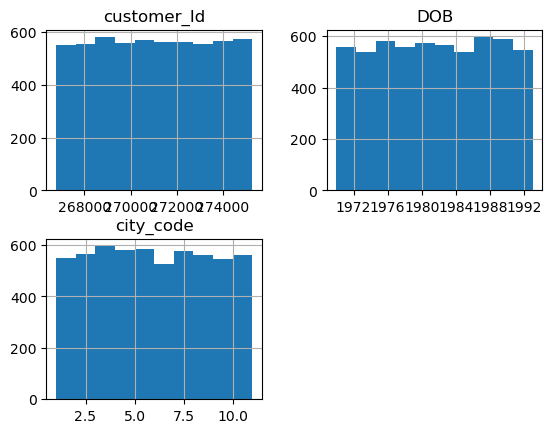

In [14]:
Customer.hist(); #모두 고르게 분포되어 있는 모습

### Transactions
```
○	Transactions.csv : 거래 내역 데이터 (고객id, 주문id, 거래 일자, 카테고리 콛, 거래 금액 등)
■	transaction_id : 거래id (거래 발생 시 부여되는 번호)
■	cust_id : 고객id (Customer의 customer_id와 동일)
■	tran_date : 거래 일자 (날짜 형식 데이터)
■	prod_sub_cat_code : 서브 카테고리 코드 (숫자 구성)
■	prod_cat_code : 대 카테고리 코드 (숫자 구성)
■	Qty : 주문 수량 (음수로 기록된 데이터도 존재)
■	Rate : 판매 금액 (음수로 기록된 데이터도 존재)
■	Tax : 세금 (음수로 기록된 데이터에도 양수로 기록됨)
■	total_amt : 거래 금액 (판매 금액 x 주문 수량 + 세금)
■	Store_type : 거래가 발생한 판매 채널 타입 (e-shop, TeleShop, Flagship store, MBR)
```

In [15]:
Transactions.info() #tran_date datetime으로 바꿀것. Null 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [16]:
Transactions = Transactions.rename(columns = {'cust_id' : 'customer_Id'}) #Customer 데이터와 컬러명 통일

In [17]:
Transactions.head()

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [18]:
Transactions.describe() # Qty, Rate, total_amt 음수 존재, 환불인지 오류인지 확인 필요

,transaction_id,customer_Id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000


In [19]:
Transactions.describe(include='object')

,tran_date,Store_type
count,23053,23053
unique,1129,4
top,13-07-2011,e-Shop
freq,35,9311


In [20]:
tran_date_list = Transactions['tran_date'].unique().tolist() 
tran_date_list # - 와 / 로 두가지 방식으로 구분되어있음.

['28-02-2014',
 '27-02-2014',
 '24-02-2014',
 '23-02-2014',
 '22-02-2014',
 '21-02-2014',
 '20-02-2014',
 '19-02-2014',
 '18-02-2014',
 '17-02-2014',
 '16-02-2014',
 '15-02-2014',
 '14-02-2014',
 '13-02-2014',
 '12/2/2014',
 '11/2/2014',
 '10/2/2014',
 '9/2/2014',
 '8/2/2014',
 '7/2/2014',
 '6/2/2014',
 '5/2/2014',
 '4/2/2014',
 '3/2/2014',
 '2/2/2014',
 '1/2/2014',
 '31-01-2014',
 '30-01-2014',
 '29-01-2014',
 '28-01-2014',
 '27-01-2014',
 '26-01-2014',
 '25-01-2014',
 '24-01-2014',
 '23-01-2014',
 '22-01-2014',
 '21-01-2014',
 '20-01-2014',
 '19-01-2014',
 '18-01-2014',
 '17-01-2014',
 '16-01-2014',
 '15-01-2014',
 '14-01-2014',
 '13-01-2014',
 '12/1/2014',
 '11/1/2014',
 '10/1/2014',
 '9/1/2014',
 '8/1/2014',
 '7/1/2014',
 '6/1/2014',
 '5/1/2014',
 '4/1/2014',
 '3/1/2014',
 '2/1/2014',
 '1/1/2014',
 '31-12-2013',
 '30-12-2013',
 '29-12-2013',
 '28-12-2013',
 '27-12-2013',
 '26-12-2013',
 '25-12-2013',
 '24-12-2013',
 '23-12-2013',
 '22-12-2013',
 '21-12-2013',
 '20-12-2013',
 '19-12

In [21]:
trand_date_slash = Transactions[Transactions['tran_date'].str.contains('/')]

In [22]:
trand_date_slash.tran_date.unique() # 년도 제외 13이상의 수가 안보이나, 기존 -랑 포맷은 동일하다고 생각됨.

array(['12/2/2014', '11/2/2014', '10/2/2014', '9/2/2014', '8/2/2014',
       '7/2/2014', '6/2/2014', '5/2/2014', '4/2/2014', '3/2/2014',
       '2/2/2014', '1/2/2014', '12/1/2014', '11/1/2014', '10/1/2014',
       '9/1/2014', '8/1/2014', '7/1/2014', '6/1/2014', '5/1/2014',
       '4/1/2014', '3/1/2014', '2/1/2014', '1/1/2014', '12/12/2013',
       '11/12/2013', '10/12/2013', '9/12/2013', '8/12/2013', '7/12/2013',
       '6/12/2013', '5/12/2013', '4/12/2013', '3/12/2013', '2/12/2013',
       '1/12/2013', '12/11/2013', '11/11/2013', '10/11/2013', '9/11/2013',
       '8/11/2013', '7/11/2013', '6/11/2013', '5/11/2013', '4/11/2013',
       '3/11/2013', '2/11/2013', '1/11/2013', '12/10/2013', '11/10/2013',
       '10/10/2013', '9/10/2013', '8/10/2013', '7/10/2013', '6/10/2013',
       '5/10/2013', '4/10/2013', '3/10/2013', '2/10/2013', '1/10/2013',
       '12/9/2013', '11/9/2013', '10/9/2013', '9/9/2013', '8/9/2013',
       '7/9/2013', '6/9/2013', '5/9/2013', '4/9/2013', '3/9/2013',
       '

In [23]:
Transactions['tran_date'] = Transactions['tran_date'].str.replace('/','-') # - 형태로 통일

In [24]:
Transactions['tran_date'] = pd.to_datetime(Transactions['tran_date'],format='%d-%m-%Y')

In [25]:
print(Transactions['tran_date'].min())
print(Transactions['tran_date'].max())

2011-01-25 00:00:00
2014-02-28 00:00:00


In [26]:
Transactions[Transactions.duplicated(keep=False)]

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
3236,63833750229,269016,2013-09-19,10,6,-3,-460,144.900,-1524.900,TeleShop
3237,63833750229,269016,2013-09-19,10,6,-3,-460,144.900,-1524.900,TeleShop
4501,54818572958,274656,2013-07-19,11,6,-5,-662,347.550,-3657.550,e-Shop
4513,54818572958,274656,2013-07-19,11,6,-5,-662,347.550,-3657.550,e-Shop
9745,93088859112,272584,2012-11-04,1,2,-1,-1168,122.640,-1290.640,e-Shop
9748,93088859112,272584,2012-11-04,1,2,-1,-1168,122.640,-1290.640,e-Shop
10009,48727689115,270330,2012-10-21,4,3,-4,-1158,486.360,-5118.360,TeleShop
10016,48727689115,270330,2012-10-21,4,3,-4,-1158,486.360,-5118.360,TeleShop
10784,95523406151,273937,2012-09-16,8,3,-5,-483,253.575,-2668.575,e-Shop
10785,95523406151,273937,2012-09-16,8,3,-5,-483,253.575,-2668.575,e-Shop


In [27]:
Transactions.drop_duplicates() # 23053 -> 23040 13개 중복 삭제

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop


In [28]:
Transactions[Transactions['total_amt'] <= 0] # total_amt 가 음수인 값들 확인 -> Qty,Rate도 음수

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
22919,42161597232,267094,2011-01-31,3,1,-3,-147,46.305,-487.305,MBR
22926,72870271171,270911,2011-01-31,11,5,-3,-1142,359.730,-3785.730,TeleShop
22929,90114483354,268097,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop
22977,99568595128,273973,2011-01-29,4,2,-3,-203,63.945,-672.945,e-Shop


In [29]:
Transactions[Transactions['customer_Id'] == 270351].sort_values('tran_date',ascending=False) # 8일후에 환불한 것으로 확인됨 -> 환불 컬럼 추가

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop
26,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop
3282,36957441426,270351,2013-09-16,3,2,3,361,113.715,1196.715,Flagship store
6962,12236277258,270351,2013-03-18,8,3,3,1030,324.450,3414.450,e-Shop
16430,13181563739,270351,2011-12-13,6,5,1,1048,110.040,1158.040,e-Shop


In [30]:
Transactions['Cancel'] = (Transactions['total_amt'] <= 0).astype(int) #취소된 건이면 1 아니면 0 새 컬럼 생성
Transactions['Cancel'].value_counts() #2177개 확인됨, 취소된 건 표시

Cancel
0    20876
1     2177
Name: count, dtype: int64

In [31]:
# pd.set_option('display.max_rows',None)
# pd.reset_option('display.max_rows',None)

In [32]:
Transactions[Transactions['transaction_id']==51750724947] # 취소 중복 확인됨.

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,Cancel
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.11,-1748.11,TeleShop,1
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.11,-1748.11,TeleShop,1
84,51750724947,273420,2014-02-16,6,5,2,791,166.11,1748.11,TeleShop,0


In [33]:
# transaction_id 단위로 각 주문 상태별 레코드 집계
od_ca_result = Transactions.groupby('transaction_id').agg(
    od_n=pd.NamedAgg(column='Cancel', aggfunc=lambda x: (x == 0).sum()),
    ca_n=pd.NamedAgg(column='Cancel', aggfunc=lambda x: (x == 1).sum())
).reset_index()
od_ca_result.head()

,transaction_id,od_n,ca_n
0,3268991,1,0
1,7073244,1,0
2,10861359,1,0
3,15741026,1,0
4,16165359,1,0


In [34]:
# cancel이 더 많은 데이터 확인
omit_df = od_ca_result[od_ca_result['od_n'] < od_ca_result['ca_n']]
omit_df #117개의 불균형 존재

,transaction_id,od_n,ca_n
90,426787191,1,3
645,3130889793,1,2
846,4170892941,1,3
944,4545655117,1,2
1135,5479136053,1,2
...,...,...,...
20021,96022343023,1,2
20082,96272226619,1,2
20329,97439039119,0,1
20494,98271941861,1,2


In [35]:
# 중복 취소건 제거
Transactions = Transactions.drop_duplicates(subset=['Cancel','transaction_id'],keep='first') 

In [36]:
#주문건수 0이나 취소 건 제거
Transactions = Transactions[~Transactions['transaction_id'].isin(omit_df[omit_df['od_n'] == 0]['transaction_id'])]

In [37]:
Transactions['Cancel'].value_counts()

Cancel
0    20876
1     2057
Name: count, dtype: int64

In [38]:
# canceled_df 생성
canceled_df = (
    Transactions
    .loc[Transactions['Cancel'] == 1]
    .loc[:, ['transaction_id']]
    .assign(confirmed_yn=0)
    .drop_duplicates()
)
canceled_df.head()

,transaction_id,confirmed_yn
0,80712190438,0
1,29258453508,0
2,51750724947,0
3,93274880719,0
6,45649838090,0


In [39]:
# canceled_df 정보 join
Transactions = Transactions.merge(canceled_df, on='transaction_id', how='left')
Transactions['confirmed_yn'] = Transactions['confirmed_yn'].fillna(1)
Transactions.head() #확정시 1, 취소건 0

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,Cancel,confirmed_yn
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1,0.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,1,0.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,1,0.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,1,0.0
4,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,1,0.0


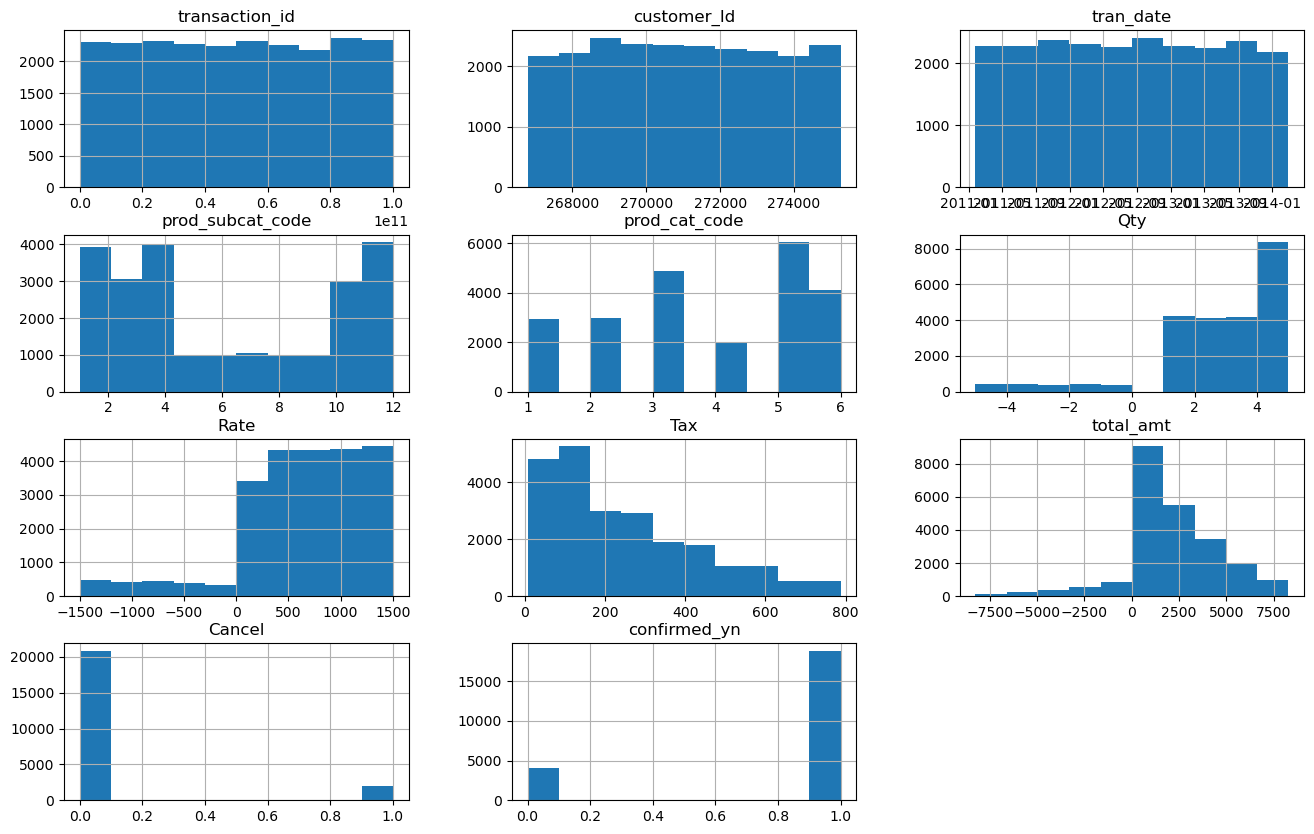

In [40]:
Transactions.hist(figsize=(16,10));

In [41]:
Transactions['confirmed_yn'].value_counts() #구매확정 18819건

confirmed_yn
1.0    18819
0.0     4114
Name: count, dtype: int64

### prod_cat_info

```
○	prod_cat_info : 카테고리 코드/명칭 데이터 (대 카테고리 코드/명칭, 서브 카테고리 코드/명칭)
■	prod_cat_code : 대 카테고리 코드 (Transactions 데이터에도 존재)
■	prod_cat : 대 카테고리 명칭
■	prod_sub_cat_code : 서브 카테고리 코드 (Transactions 데이터에도 존재)
■	prod_subcat : 서브 카테고리 명칭
```

In [42]:
prod_cat_info.info() # Null 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 868.0+ bytes


In [43]:
prod_cat_info.describe()

,prod_cat_code,prod_sub_cat_code
count,23.000000,23.000000
mean,3.739130,6.130435
std,1.711389,3.805550
min,1.000000,1.000000
25%,2.500000,3.000000
50%,4.000000,5.000000
75%,5.000000,10.000000
max,6.000000,12.000000


In [44]:
prod_cat_info.describe(exclude='number')

,prod_cat,prod_subcat
count,23,23
unique,6,18
top,Books,Mens
freq,6,3


In [45]:
prod_cat_info = prod_cat_info.rename(columns={'prod_sub_cat_code':'prod_subcat_code'}) #Transaction과 통일

In [46]:
prod_cat_info

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


### Merge

In [47]:
merged_data = Transactions.merge(Customer, on = 'customer_Id',how ='left')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22933 entries, 0 to 22932
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    22933 non-null  int64         
 1   customer_Id       22933 non-null  int64         
 2   tran_date         22933 non-null  datetime64[ns]
 3   prod_subcat_code  22933 non-null  int64         
 4   prod_cat_code     22933 non-null  int64         
 5   Qty               22933 non-null  int64         
 6   Rate              22933 non-null  int64         
 7   Tax               22933 non-null  float64       
 8   total_amt         22933 non-null  float64       
 9   Store_type        22933 non-null  object        
 10  Cancel            22933 non-null  int32         
 11  confirmed_yn      22933 non-null  float64       
 12  DOB               22933 non-null  datetime64[ns]
 13  Gender            22933 non-null  object        
 14  city_code         2293

In [48]:
merged_data.isnull().sum() #회원 결측치 없음

transaction_id      0
customer_Id         0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
Cancel              0
confirmed_yn        0
DOB                 0
Gender              0
city_code           0
dtype: int64

In [49]:
merged_data = merged_data.merge(prod_cat_info, on = ['prod_cat_code', 'prod_subcat_code'],how ='left')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22933 entries, 0 to 22932
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    22933 non-null  int64         
 1   customer_Id       22933 non-null  int64         
 2   tran_date         22933 non-null  datetime64[ns]
 3   prod_subcat_code  22933 non-null  int64         
 4   prod_cat_code     22933 non-null  int64         
 5   Qty               22933 non-null  int64         
 6   Rate              22933 non-null  int64         
 7   Tax               22933 non-null  float64       
 8   total_amt         22933 non-null  float64       
 9   Store_type        22933 non-null  object        
 10  Cancel            22933 non-null  int32         
 11  confirmed_yn      22933 non-null  float64       
 12  DOB               22933 non-null  datetime64[ns]
 13  Gender            22933 non-null  object        
 14  city_code         2293

In [50]:
merged_data.isnull().sum() #상품 결측치 없음

transaction_id      0
customer_Id         0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
Cancel              0
confirmed_yn        0
DOB                 0
Gender              0
city_code           0
prod_cat            0
prod_subcat         0
dtype: int64

In [51]:
merged_data['age'] = merged_data['tran_date'].dt.year - merged_data['DOB'].dt.year
merged_data['age'].value_counts().sort_index() #19~44세

age
19     337
20     594
21     952
22     943
23    1040
24    1074
25    1048
26    1007
27     971
28     942
29     943
30     932
31     990
32    1048
33    1060
34     964
35    1009
36    1016
37    1063
38     998
39     986
40     997
41     964
42     658
43     351
44      46
Name: count, dtype: int64

In [52]:
merged_data.to_csv('merged_data.csv', index=False)

## EDA

#### 2011 나이,성별 확인

In [53]:
#2011년 시간대 추출
customer_2011 = merged_data[merged_data['tran_date'].dt.year == 2011][['customer_Id','age','DOB','Gender']].drop_duplicates(subset='customer_Id')
customer_2011.head()

,customer_Id,age,DOB,Gender
15977,272142,23,1988-10-13,M
15978,273764,29,1982-03-13,M
15979,273899,19,1992-10-07,F
15980,270491,23,1988-02-01,M
15981,269792,32,1979-11-24,F


In [54]:
customer_2011['age'].value_counts().sort_index() #19~41세

age
19    186
20    143
21    155
22    183
23    168
24    179
25    147
26    158
27    155
28    152
29    182
30    156
31    166
32    167
33    168
34    169
35    151
36    187
37    174
38    152
39    165
40    167
41    160
Name: count, dtype: int64

In [55]:
#5살 범위로 나누기
customer_2011['age_group'] = pd.cut(customer_2011['age'], bins=range(19, 45, 5), labels=[f'{i}-{i+4}' for i in range(19, 44, 5)])

In [56]:
#5살 범위로 나누기(전체 데이터)
merged_data['age_group'] = pd.cut(merged_data['age'], bins=range(19, 50, 5), labels=[f'{i}-{i+4}' for i in range(19, 49, 5)])

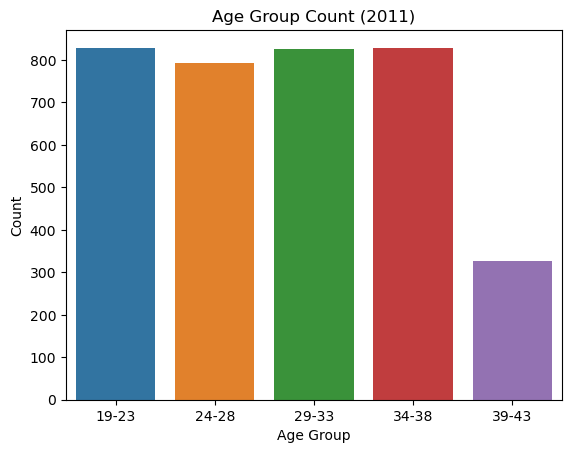

In [57]:
sns.countplot(x='age_group', data=customer_2011)
plt.title('Age Group Count (2011)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

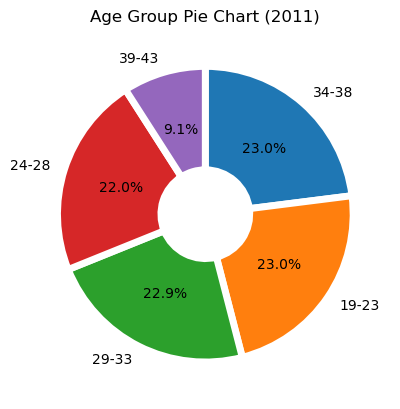

In [58]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
age_group_counts = customer_2011['age_group'].value_counts()


plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%.1f%%',
        startangle=90, counterclock=False, wedgeprops=wedgeprops)
plt.title('Age Group Pie Chart (2011)')
plt.show()

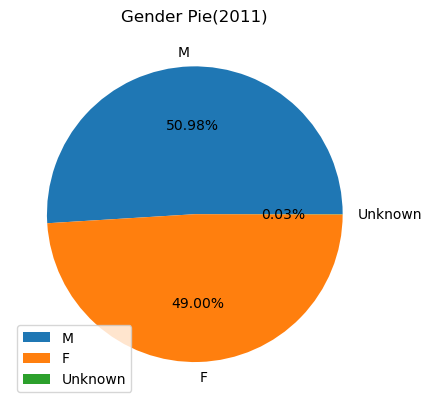

In [59]:
gender_counts = customer_2011['Gender'].value_counts()
plt.title('Gender Pie(2011)')
plt.pie(gender_counts,
        labels= gender_counts.index,
        startangle=0,
        autopct=lambda p : '{:.2f}%'.format(p),
        )
plt.legend(gender_counts.index)
plt.show()

#### 2013 구매

In [60]:
#첫 구매 날짜, 구매 경과일수(2013년 2월 28일 기준)
merged_data['first_purchase_date'] = merged_data.groupby('customer_Id')['tran_date'].transform('min')

merged_until_2013 = merged_data[merged_data['tran_date'] < '2013-03-01'][['customer_Id','age','age_group','tran_date','Gender','Cancel','confirmed_yn','first_purchase_date']]

In [61]:
# 방문횟수 확인 (취소 제외,2013-02-28기준)
total_purchased = pd.DataFrame(merged_until_2013[merged_until_2013['confirmed_yn']==1]['customer_Id'].value_counts())

In [62]:
# 2013-02-28 기준 회원 정보
reference_date = pd.to_datetime('2013-02-28')

customer_2013 = merged_until_2013[['customer_Id','age','age_group','tran_date','Gender','first_purchase_date']].drop_duplicates(subset='customer_Id',keep='first')
customer_2013.head()

,customer_Id,age,age_group,tran_date,Gender,first_purchase_date
7327,273805,38,34-38,2013-02-28,M,2011-06-08
7328,269273,27,24-28,2013-02-28,F,2012-10-19
7329,267832,34,29-33,2013-02-28,M,2011-09-14
7330,274576,26,24-28,2013-02-28,M,2012-10-07
7331,267233,26,24-28,2013-02-28,F,2011-05-22


In [63]:
# 총 구매일수(count) 추가
customer_2013 = customer_2013.merge(total_purchased,on='customer_Id',how='left')
customer_2013.head()

,customer_Id,age,age_group,tran_date,Gender,first_purchase_date,count
0,273805,38,34-38,2013-02-28,M,2011-06-08,3.0
1,269273,27,24-28,2013-02-28,F,2012-10-19,1.0
2,267832,34,29-33,2013-02-28,M,2011-09-14,5.0
3,274576,26,24-28,2013-02-28,M,2012-10-07,3.0
4,267233,26,24-28,2013-02-28,F,2011-05-22,5.0


In [64]:
# 구매 경과일수 = 기준일 - 마지막 구매일
# 구매주기 = (마지막 구매일 - 첫 구매일)/(총 구매 일수 - 1
customer_2013['days_elapsed'] = reference_date - customer_2013['tran_date']

customer_2013['purchase_cycle'] = (customer_2013['tran_date'] - customer_2013['first_purchase_date']) / (customer_2013['count'] - 1)

customer_2013.head()

,customer_Id,age,age_group,tran_date,Gender,first_purchase_date,count,days_elapsed,purchase_cycle
0,273805,38,34-38,2013-02-28,M,2011-06-08,3.0,0 days,315 days 12:00:00
1,269273,27,24-28,2013-02-28,F,2012-10-19,1.0,0 days,NaT
2,267832,34,29-33,2013-02-28,M,2011-09-14,5.0,0 days,133 days 06:00:00
3,274576,26,24-28,2013-02-28,M,2012-10-07,3.0,0 days,72 days 00:00:00
4,267233,26,24-28,2013-02-28,F,2011-05-22,5.0,0 days,162 days 00:00:00


In [65]:
customer_2013[customer_2013['count']==1] # 1376명이 한번만 방문하여 구매주기가 계산되지않음

,customer_Id,age,age_group,tran_date,Gender,first_purchase_date,count,days_elapsed,purchase_cycle
1,269273,27,24-28,2013-02-28,F,2012-10-19,1.0,0 days,NaT
12,269799,32,29-33,2013-02-28,M,2011-06-18,1.0,0 days,NaT
15,271530,21,19-23,2013-02-28,F,2011-08-17,1.0,0 days,NaT
18,268945,22,19-23,2013-02-27,M,2013-02-27,1.0,1 days,NaT
19,269839,36,34-38,2013-02-27,M,2013-02-27,1.0,1 days,NaT
...,...,...,...,...,...,...,...,...,...
5184,273676,33,29-33,2011-01-26,M,2011-01-26,1.0,764 days,NaT
5185,270550,26,24-28,2011-01-26,F,2011-01-26,1.0,764 days,NaT
5186,273723,27,24-28,2011-01-26,F,2011-01-26,1.0,764 days,NaT
5187,269160,39,34-38,2011-01-25,F,2011-01-25,1.0,765 days,NaT


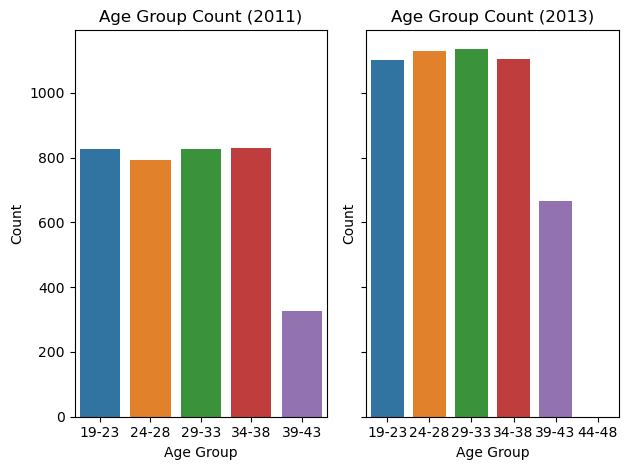

In [66]:
fig, axes = plt.subplots(1, 2,sharey=True)

sns.countplot(x='age_group', data=customer_2011, ax=axes[0])
axes[0].set_title('Age Group Count (2011)')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')


sns.countplot(x='age_group', data=customer_2013,ax=axes[1])
axes[1].set_title('Age Group Count (2013)')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show() #전체적으로 고객이 늘었음.

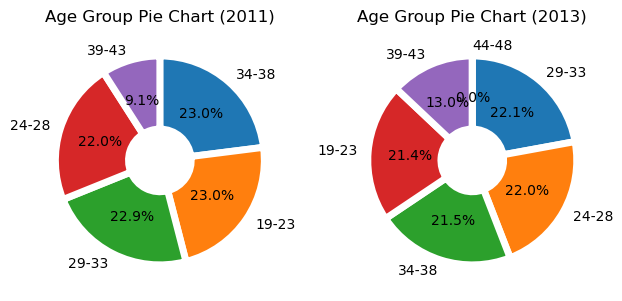

In [67]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
age_group_counts_2013 = customer_2013['age_group'].value_counts()

fig, axes = plt.subplots(1, 2,sharey=True)

axes[0].pie(age_group_counts, labels=age_group_counts.index, autopct='%.1f%%',
        startangle=90, counterclock=False, wedgeprops=wedgeprops)
axes[0].set_title('Age Group Pie Chart (2011)')


axes[1].pie(age_group_counts_2013, labels=age_group_counts_2013.index, autopct='%.1f%%',
        startangle=90, counterclock=False, wedgeprops=wedgeprops)
axes[1].set_title('Age Group Pie Chart (2013)')

plt.tight_layout()
plt.show()  #39-43의 비율이 높아짐

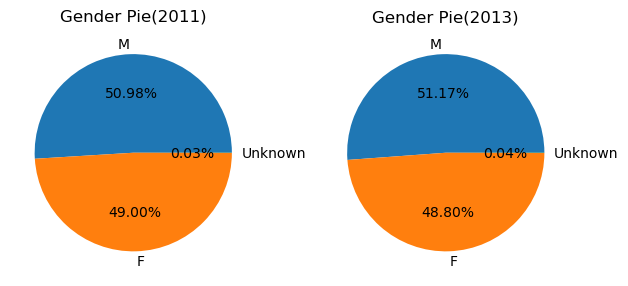

In [68]:
gender_counts_2013 = customer_2013['Gender'].value_counts()

fig, axes = plt.subplots(1, 2,sharey=True)

axes[0].pie(gender_counts,
        labels= gender_counts.index,
        startangle=0,
        autopct=lambda p : '{:.2f}%'.format(p),
        )
axes[0].set_title('Gender Pie(2011)')


axes[1].pie(gender_counts_2013,
        labels= gender_counts_2013.index,
        startangle=0,
        autopct=lambda p : '{:.2f}%'.format(p),
        )
axes[1].set_title('Gender Pie(2013)')

plt.tight_layout()
plt.show()  #남성의 비율이 소폭 상승

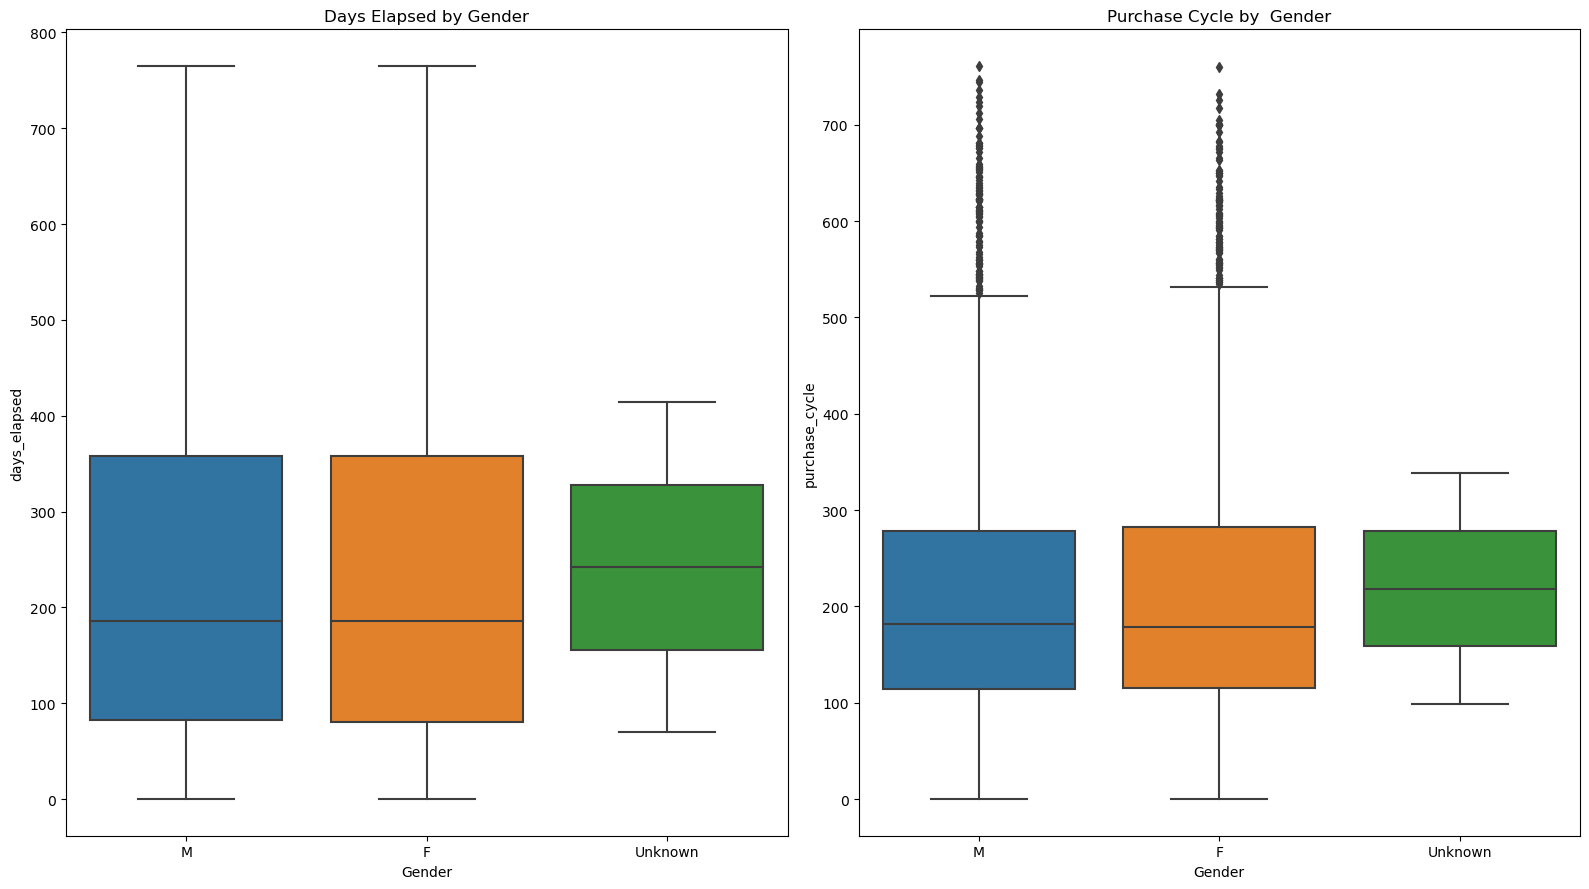

In [69]:

plt.figure(figsize=(16, 9))
# Boxplot: 성별에 따른 days_elapsed
plt.subplot(1, 2, 1)
sns.boxplot(x= customer_2013['Gender'], y=customer_2013['days_elapsed'].dt.days)
plt.title('Days Elapsed by Gender')

# Boxplot: 성별에 따른 purchase_cycle
plt.subplot(1, 2, 2)
sns.boxplot(x= customer_2013['Gender'], y=customer_2013['purchase_cycle'].dt.days)
plt.title('Purchase Cycle by  Gender')

plt.tight_layout()
plt.show() #남여 큰 차이 없어보임

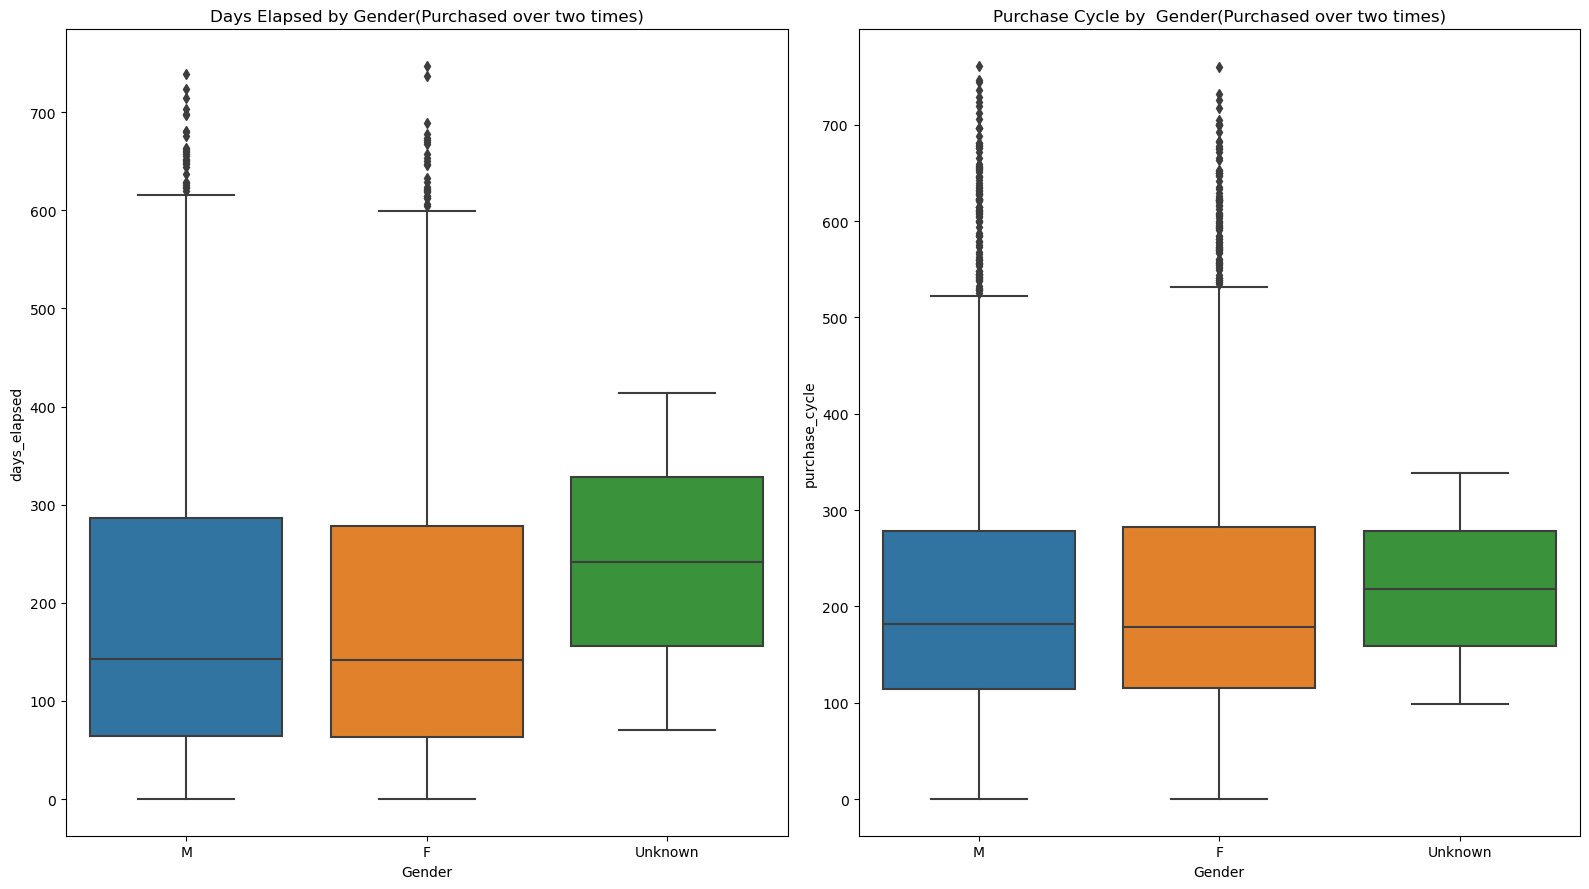

In [70]:
#2회이상 방문자들만


plt.figure(figsize=(16, 9))
# Boxplot: 성별에 따른 days_elapsed
plt.subplot(1, 2, 1)
sns.boxplot(x= customer_2013['Gender'], y=customer_2013[customer_2013['count'] > 1]['days_elapsed'].dt.days)
plt.title('Days Elapsed by Gender(Purchased over two times)')

# Boxplot: 성별에 따른 purchase_cycle
plt.subplot(1, 2, 2)
sns.boxplot(x= customer_2013['Gender'], y=customer_2013[customer_2013['count'] > 1]['purchase_cycle'].dt.days)
plt.title('Purchase Cycle by  Gender(Purchased over two times)')

plt.tight_layout()
plt.show() #남여 큰 차이없어보임

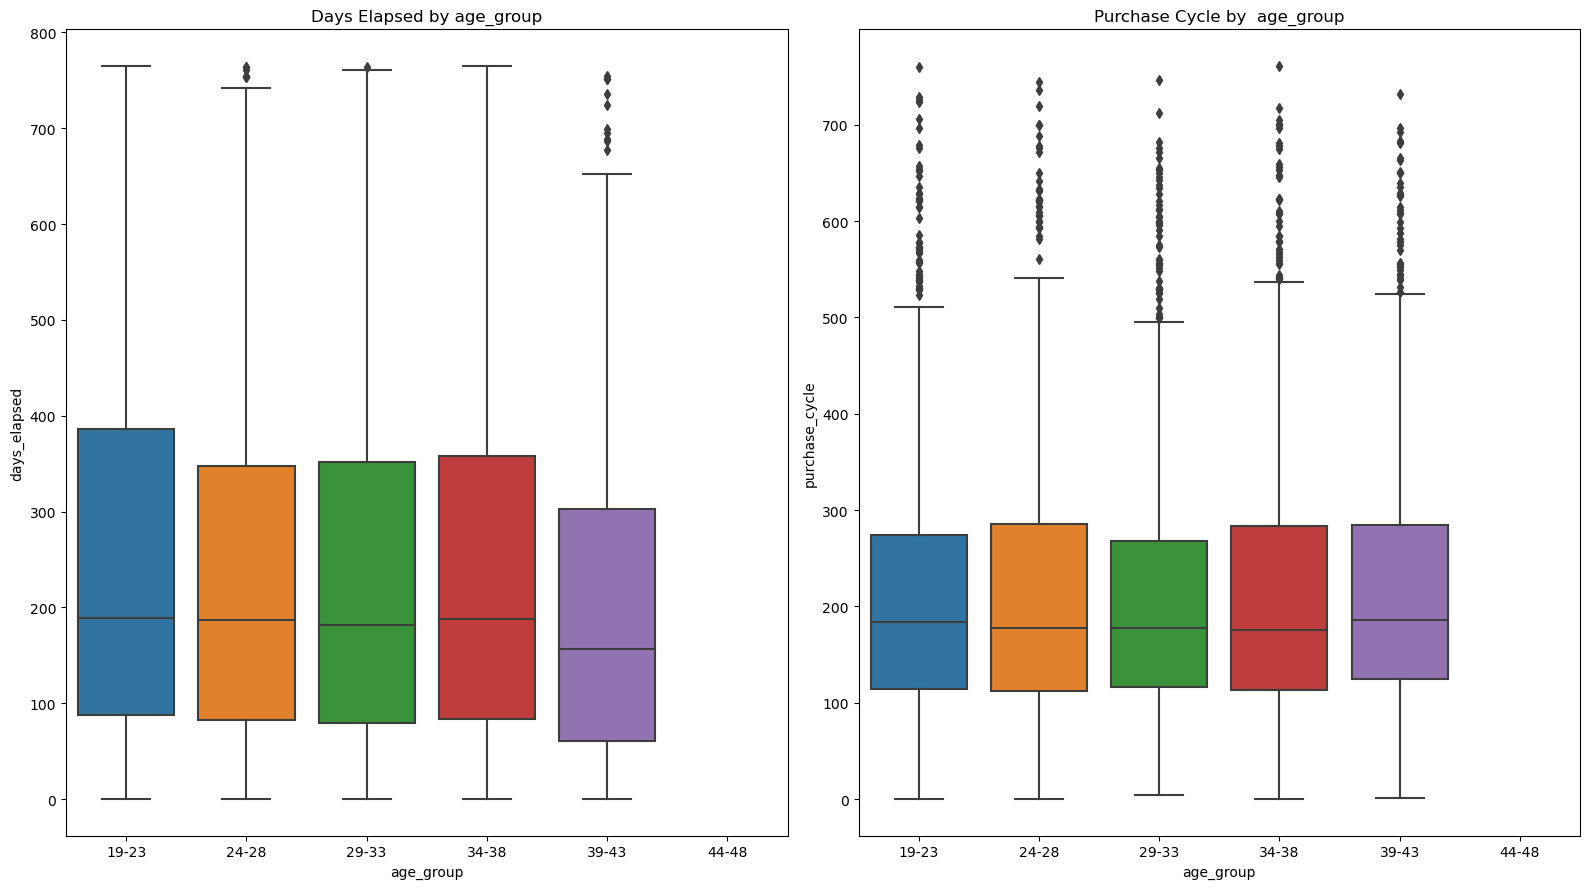

In [71]:
# Countplot: 성별에 따른 count
plt.figure(figsize=(16, 9))

# Boxplot: 성별에 따른 days_elapsed
plt.subplot(1, 2, 1)
sns.boxplot(x= customer_2013['age_group'], y=customer_2013['days_elapsed'].dt.days)
plt.title('Days Elapsed by age_group')

# Boxplot: 성별에 따른 purchase_cycle
plt.subplot(1, 2, 2)
sns.boxplot(x= customer_2013['age_group'], y=customer_2013['purchase_cycle'].dt.days)
plt.title('Purchase Cycle by  age_group')

plt.tight_layout()
plt.show() #39-43의 구매 경과일수가 상대적으로 낮으며 주기 또한 길다

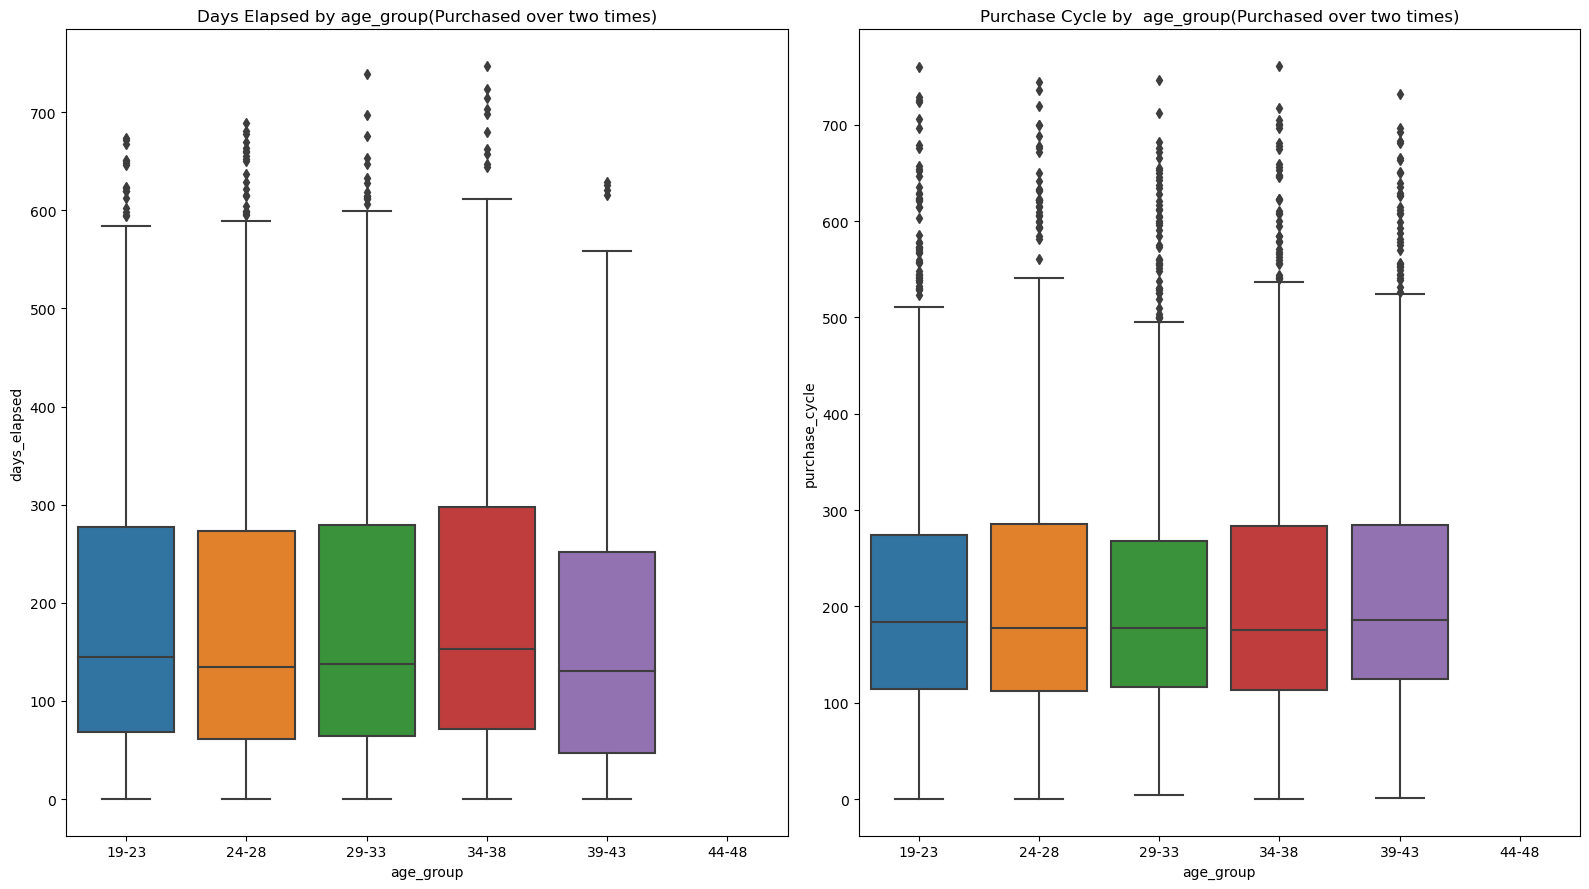

In [72]:
#2회이상 방문자들만

plt.figure(figsize=(16, 9))

# Boxplot: 성별에 따른 days_elapsed
plt.subplot(1, 2, 1)
sns.boxplot(x= customer_2013['age_group'], y=customer_2013[customer_2013['count'] > 1]['days_elapsed'].dt.days)
plt.title('Days Elapsed by age_group(Purchased over two times)')

# Boxplot: 성별에 따른 purchase_cycle
plt.subplot(1, 2, 2)
sns.boxplot(x= customer_2013['age_group'], y=customer_2013[customer_2013['count'] > 1]['purchase_cycle'].dt.days)
plt.title('Purchase Cycle by  age_group(Purchased over two times)')

plt.tight_layout()
plt.show() #34-38의 경과일수가 상대적으로 높음 -> 1회 결제 후 미방문 고객이 많은편

#### 30일 이상 프로모션

In [73]:
#경과일수 30일 이상
campaign_target = customer_2013[customer_2013['days_elapsed'].dt.days >= 30]
campaign_target.nunique()

customer_Id            4675
age                      25
age_group                 5
tran_date               706
Gender                    3
first_purchase_date     697
count                     9
days_elapsed            706
purchase_cycle         1252
dtype: int64

In [74]:
#2013년 3월 1일부터 12월 31일까지 거래한 고객
customer_purchased_during_campaign= merged_data[(merged_data['tran_date'] < '2014-01-01')&
               (merged_data['tran_date'] >= '2013-03-01')&
                (merged_data['confirmed_yn']==1)][['customer_Id','tran_date']].drop_duplicates()
customer_purchased_during_campaign['participated_campaign'] = 1

customer_purchased_during_campaign.head()

,customer_Id,tran_date,participated_campaign
1058,275068,2013-12-31,1
1059,274568,2013-12-31,1
1061,268722,2013-12-31,1
1062,273836,2013-12-31,1
1064,274734,2013-12-31,1


In [75]:
campaign_check = campaign_target.merge(customer_purchased_during_campaign,on='customer_Id',how='left')
campaign_check.head()

,customer_Id,age,age_group,tran_date_x,Gender,first_purchase_date,count,days_elapsed,purchase_cycle,tran_date_y,participated_campaign
0,271664,34,29-33,2013-01-29,M,2011-08-06,4.0,30 days,180 days 16:00:00,NaT,NaN
1,266824,40,39-43,2013-01-29,M,2011-11-11,3.0,30 days,222 days 12:00:00,2013-11-03,1.0
2,271822,38,34-38,2013-01-29,M,2011-02-25,4.0,30 days,234 days 16:00:00,NaT,NaN
3,268143,33,29-33,2013-01-29,M,2011-12-21,3.0,30 days,202 days 12:00:00,2013-08-09,1.0
4,268304,33,29-33,2013-01-29,F,2012-04-19,3.0,30 days,142 days 12:00:00,NaT,NaN


In [76]:
campaign_check[campaign_check['participated_campaign']==1]['customer_Id'].nunique() #2800명/4675명 참여 

2800

#### 요일별 확인

In [77]:
#요일 추가
merged_data['day_of_week'] = merged_data['tran_date'].dt.day_name()
merged_data.head()

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,...,confirmed_yn,DOB,Gender,city_code,prod_cat,prod_subcat,age,age_group,first_purchase_date,day_of_week
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,...,0.0,1981-09-26,M,5.0,Clothing,Women,33,29-33,2011-12-13,Friday
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,...,0.0,1973-05-11,F,8.0,Electronics,Computers,41,39-43,2011-02-03,Thursday
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,...,0.0,1992-07-27,M,8.0,Books,DIY,22,19-23,2012-09-23,Monday
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,...,0.0,1981-06-08,M,3.0,Home and kitchen,Bath,33,29-33,2011-06-02,Monday
4,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,...,0.0,1981-05-29,M,9.0,Home and kitchen,Bath,33,29-33,2012-09-01,Saturday


In [78]:
#환불 건 제외 구매확정건 요일 비교
daily_purchase_counts = pd.DataFrame(merged_data[merged_data['confirmed_yn']==1].groupby('day_of_week')['transaction_id'].count())
daily_purchase_counts #전체적으로 비슷하며, 금요일이 제일 많음.

,transaction_id
day_of_week,
Friday,2750
Monday,2637
Saturday,2687
Sunday,2729
Thursday,2701
Tuesday,2611
Wednesday,2704


In [79]:
# 기간 내 요일 등장 횟수 확인
number_of_day = pd.DataFrame(merged_data.drop_duplicates(subset = 'tran_date').value_counts(subset='day_of_week'))
number_of_day

,count
day_of_week,
Friday,162
Thursday,162
Monday,161
Saturday,161
Tuesday,161
Wednesday,161
Sunday,160


In [80]:
# 일별거래량
daily_purchase_counts = daily_purchase_counts.merge(number_of_day,on='day_of_week')
daily_purchase_counts['trans/day'] = daily_purchase_counts['transaction_id']/daily_purchase_counts['count']
daily_purchase_counts #일요일이 평균적으로 제일 높다

,transaction_id,count,trans/day
day_of_week,,,
Friday,2750,162,16.975309
Monday,2637,161,16.378882
Saturday,2687,161,16.689441
Sunday,2729,160,17.056250
Thursday,2701,162,16.672840
Tuesday,2611,161,16.217391
Wednesday,2704,161,16.795031


#### 2011 ~2013 월 평균 매출액이 높은 대 카테고리

1Clothing          
2Footwear          
3Electronics       
4Bags              
5Books             
6Home and kitchen  

In [81]:
merged_data

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,...,confirmed_yn,DOB,Gender,city_code,prod_cat,prod_subcat,age,age_group,first_purchase_date,day_of_week
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,...,0.0,1981-09-26,M,5.0,Clothing,Women,33,29-33,2011-12-13,Friday
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,...,0.0,1973-05-11,F,8.0,Electronics,Computers,41,39-43,2011-02-03,Thursday
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,...,0.0,1992-07-27,M,8.0,Books,DIY,22,19-23,2012-09-23,Monday
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,...,0.0,1981-06-08,M,3.0,Home and kitchen,Bath,33,29-33,2011-06-02,Monday
4,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,...,0.0,1981-05-29,M,9.0,Home and kitchen,Bath,33,29-33,2012-09-01,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22928,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,...,1.0,1972-02-21,M,7.0,Books,Academic,39,34-38,2011-01-25,Tuesday
22929,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,...,1.0,1984-04-27,M,9.0,Clothing,Mens,27,24-28,2011-01-25,Tuesday
22930,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,...,1.0,1976-06-20,M,8.0,Home and kitchen,Furnishing,35,34-38,2011-01-25,Tuesday
22931,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,...,0.0,1970-05-22,M,2.0,Books,Children,41,39-43,2011-01-25,Tuesday


In [82]:
# 월 컬럼 생성
merged_data['year'] = merged_data['tran_date'].dt.year
merged_data['month'] = merged_data['tran_date'].dt.month

In [83]:
# 2011+2012+2013 카테고리별 월 평균 매출
monthly_category = pd.DataFrame(merged_data[(merged_data['tran_date'] < '2014-01-01')
                                      &(merged_data['confirmed_yn']==1)].groupby(['prod_cat','year','month'])['total_amt'].sum())
monthly_category

total_amt
prod_cat         year month            
Bags             2011 1       27712.295
                      2       71115.590
                      3      136553.690
                      4      172639.675
                      5       82688.255
...                                 ...
Home and kitchen 2013 8      207405.185
                      9      265680.675
                      10     301007.525
                      11     221639.795
                      12     219185.590

[216 rows x 1 columns]

In [84]:
#3년간 카테고리별 월평균매출
monthly_avg_by_category_table = monthly_category.groupby('prod_cat')['total_amt'].agg(['mean','var','std'])
monthly_avg_by_category_table['cv'] = monthly_avg_by_category_table['std']/monthly_avg_by_category_table['mean']#변동계수
monthly_avg_by_category_table.sort_values('mean',ascending=False) #books가 1위

,mean,var,std,cv
prod_cat,,,,
Books,341675.269722,2.983746e+09,54623.674461,0.159870
Electronics,285979.340833,2.753300e+09,52471.897986,0.183481
Home and kitchen,224516.846667,1.795410e+09,42372.284491,0.188727
Footwear,166962.399861,1.347298e+09,36705.556213,0.219843
Clothing,166016.243611,1.630642e+09,40381.211425,0.243237
Bags,109989.612778,6.263742e+08,25027.469383,0.227544


In [85]:
monthly_avg_by_category_table.sort_values('cv',ascending=False) #Clothing 1위, Clothing과 Bags 시즌마다 매출변동성 큼 

,mean,var,std,cv
prod_cat,,,,
Clothing,166016.243611,1.630642e+09,40381.211425,0.243237
Bags,109989.612778,6.263742e+08,25027.469383,0.227544
Footwear,166962.399861,1.347298e+09,36705.556213,0.219843
Home and kitchen,224516.846667,1.795410e+09,42372.284491,0.188727
Electronics,285979.340833,2.753300e+09,52471.897986,0.183481
Books,341675.269722,2.983746e+09,54623.674461,0.159870


# 2. Interpretation & Hypothesising
```
●	다음의 두 가지 주제 중 하나를 선택하여, 가설을 수립하고 데이터 탐색 후 비즈니스 문제를 정의해보세요. 그리고 정의된 문제를 개선하기 위한 아이디어 또는 방안을 제시해 주세요.
○	주제 1. 매출 관점에서 카테고리별 매출 성장 방안
○	주제 2. 고객 관점에서 구매 활동성 증대 방안

```

주제 2. 고객 관점에서 구매 활동성 증대 방안


In [86]:
# 구매확정건만 추출
retention_data = merged_data[merged_data['confirmed_yn'] == 1]
retention_data

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,...,Gender,city_code,prod_cat,prod_subcat,age,age_group,first_purchase_date,day_of_week,year,month
9,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,...,M,1.0,Home and kitchen,Tools,28,24-28,2013-03-10,Thursday,2014,2
10,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,...,M,6.0,Books,DIY,43,39-43,2011-08-18,Thursday,2014,2
12,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,...,F,10.0,Books,Comics,44,39-43,2011-03-18,Thursday,2014,2
13,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,...,M,9.0,Books,Fiction,35,34-38,2012-10-23,Thursday,2014,2
14,54295803788,270787,2014-02-20,12,5,5,584,306.600,3226.600,e-Shop,...,F,6.0,Books,Academic,41,39-43,2013-05-31,Thursday,2014,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22927,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,...,M,4.0,Footwear,Kids,37,34-38,2011-01-25,Tuesday,2011,1
22928,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,...,M,7.0,Books,Academic,39,34-38,2011-01-25,Tuesday,2011,1
22929,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,...,M,9.0,Clothing,Mens,27,24-28,2011-01-25,Tuesday,2011,1
22930,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,...,M,8.0,Home and kitchen,Furnishing,35,34-38,2011-01-25,Tuesday,2011,1


In [87]:
#행 정리
retention_data = retention_data[['customer_Id','transaction_id','tran_date']].drop_duplicates().reset_index(drop=True)
retention_data['ord_ym'] = retention_data['tran_date'].dt.to_period('M')
retention_data.head()

,customer_Id,transaction_id,tran_date,ord_ym
0,267750,25455265351,2014-02-20,2014-02
1,275023,1571002198,2014-02-20,2014-02
2,269345,36554696014,2014-02-20,2014-02
3,268799,56814940239,2014-02-20,2014-02
4,270787,54295803788,2014-02-20,2014-02


In [88]:
print(min(retention_data['tran_date'].unique()))
print(max(retention_data['tran_date'].unique()))

2011-01-25 00:00:00
2014-02-20 00:00:00


In [89]:
#모든 기간을 포함하고 있는 2012,2013만 사용
retention_data = retention_data[(retention_data['tran_date']>= '2012-01-01')&(retention_data['tran_date']<= '2013-12-31')]
print(min(retention_data['tran_date'].unique()))
print(max(retention_data['tran_date'].unique()))

2012-01-01 00:00:00
2013-12-31 00:00:00


In [90]:
#리텐션 리스트
ord_ym_list = sorted(retention_data['ord_ym'].unique().tolist())
ord_ym_list

[Period('2012-01', 'M'),
 Period('2012-02', 'M'),
 Period('2012-03', 'M'),
 Period('2012-04', 'M'),
 Period('2012-05', 'M'),
 Period('2012-06', 'M'),
 Period('2012-07', 'M'),
 Period('2012-08', 'M'),
 Period('2012-09', 'M'),
 Period('2012-10', 'M'),
 Period('2012-11', 'M'),
 Period('2012-12', 'M'),
 Period('2013-01', 'M'),
 Period('2013-02', 'M'),
 Period('2013-03', 'M'),
 Period('2013-04', 'M'),
 Period('2013-05', 'M'),
 Period('2013-06', 'M'),
 Period('2013-07', 'M'),
 Period('2013-08', 'M'),
 Period('2013-09', 'M'),
 Period('2013-10', 'M'),
 Period('2013-11', 'M'),
 Period('2013-12', 'M')]

In [91]:
# 2012년 1월 구매 확정 고객과 2012년 2월 구매 확정 고객의 집합 생성
period_start = ord_ym_list[0] # 2012-01
period_target = ord_ym_list[1] # 2012-02
period_start_users = set(retention_data.query('ord_ym == @period_start')['customer_Id'])
period_target_users = set(retention_data.query('ord_ym == @period_target')['customer_Id'])

# 잔존 유저 리스트
retained_users = period_start_users.intersection(period_target_users)

# 2012-01 ~ 2012.02구매 리텐션율
retention_rate = len(retained_users)/len(period_start_users)
print(retention_rate)

0.09240246406570841


In [92]:
# 리텐션 구간 확인
for s in ord_ym_list:
    for t in ord_ym_list:
        if s <= t:
            print(s, t)

2012-01 2012-01
2012-01 2012-02
2012-01 2012-03
2012-01 2012-04
2012-01 2012-05
2012-01 2012-06
2012-01 2012-07
2012-01 2012-08
2012-01 2012-09
2012-01 2012-10
2012-01 2012-11
2012-01 2012-12
2012-01 2013-01
2012-01 2013-02
2012-01 2013-03
2012-01 2013-04
2012-01 2013-05
2012-01 2013-06
2012-01 2013-07
2012-01 2013-08
2012-01 2013-09
2012-01 2013-10
2012-01 2013-11
2012-01 2013-12
2012-02 2012-02
2012-02 2012-03
2012-02 2012-04
2012-02 2012-05
2012-02 2012-06
2012-02 2012-07
2012-02 2012-08
2012-02 2012-09
2012-02 2012-10
2012-02 2012-11
2012-02 2012-12
2012-02 2013-01
2012-02 2013-02
2012-02 2013-03
2012-02 2013-04
2012-02 2013-05
2012-02 2013-06
2012-02 2013-07
2012-02 2013-08
2012-02 2013-09
2012-02 2013-10
2012-02 2013-11
2012-02 2013-12
2012-03 2012-03
2012-03 2012-04
2012-03 2012-05
2012-03 2012-06
2012-03 2012-07
2012-03 2012-08
2012-03 2012-09
2012-03 2012-10
2012-03 2012-11
2012-03 2012-12
2012-03 2013-01
2012-03 2013-02
2012-03 2013-03
2012-03 2013-04
2012-03 2013-05
2012-03 

In [93]:
# 리텐션율 계산 
retention = pd.DataFrame()
for s in tqdm(ord_ym_list):
    for t in ord_ym_list:
        period_start = s
        period_target = t

        if period_start <= period_target:
            period_start_users = set(retention_data.query('ord_ym == @period_start')['customer_Id'])
            period_target_users = set(retention_data.query('ord_ym == @period_target')['customer_Id'])

            retained_users = period_start_users.intersection(period_target_users)

            retention_rate = len(retained_users)/len(period_start_users)

            temp = pd.DataFrame({'cohort':[period_start], 'ord_ym':[period_target], 'retention_rate':[retention_rate]})

            retention = pd.concat([retention, temp])

  0%|          | 0/24 [00:00<?, ?it/s]

In [94]:
# 코호트 기간 컬럼 생성
retention['cohort_size(month)'] = retention.apply(lambda x: (x['ord_ym'] - x['cohort']).n, axis = 1)
retention.head()

,cohort,ord_ym,retention_rate,cohort_size(month)
0,2012-01,2012-01,1.000000,0
0,2012-01,2012-02,0.092402,1
0,2012-01,2012-03,0.088296,2
0,2012-01,2012-04,0.108830,3
0,2012-01,2012-05,0.082136,4


In [95]:
# retention 테이블 생성
retention['cohort'] = retention['cohort'].astype(str)
retention['ord_ym'] = retention['ord_ym'].astype(str)

retention_final = pd.pivot_table(data=retention, index='cohort', columns='cohort_size(month)', values='retention_rate')
retention_final

cohort_size(month),0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
cohort,,,,,,,,,,,,,,,,,,,,,
2012-01,1.0,0.092402,0.088296,0.108830,0.082136,0.088296,0.073922,0.078029,0.110883,0.098563,...,0.117043,0.082136,0.088296,0.086242,0.088296,0.065708,0.082136,0.094456,0.090349,0.096509
2012-02,1.0,0.091904,0.096280,0.105033,0.067834,0.083151,0.096280,0.102845,0.111597,0.091904,...,0.089716,0.078775,0.078775,0.070022,0.105033,0.091904,0.078775,0.083151,0.083151,NaN
2012-03,1.0,0.090909,0.088889,0.080808,0.068687,0.078788,0.082828,0.080808,0.090909,0.101010,...,0.092929,0.064646,0.094949,0.088889,0.105051,0.084848,0.086869,0.090909,NaN,NaN
2012-04,1.0,0.087935,0.089980,0.075665,0.075665,0.075665,0.104294,0.089980,0.106339,0.075665,...,0.087935,0.100204,0.102249,0.073620,0.112474,0.089980,0.094070,NaN,NaN,NaN
2012-05,1.0,0.089641,0.097610,0.085657,0.073705,0.083665,0.099602,0.095618,0.091633,0.111554,...,0.071713,0.081673,0.093625,0.099602,0.085657,0.077689,NaN,NaN,NaN,NaN
2012-06,1.0,0.069869,0.093886,0.076419,0.067686,0.080786,0.085153,0.091703,0.078603,0.117904,...,0.100437,0.082969,0.078603,0.093886,0.091703,NaN,NaN,NaN,NaN,NaN
2012-07,1.0,0.096234,0.081590,0.092050,0.087866,0.085774,0.112971,0.077406,0.092050,0.079498,...,0.079498,0.096234,0.071130,0.062762,NaN,NaN,NaN,NaN,NaN,NaN
2012-08,1.0,0.092827,0.097046,0.086498,0.094937,0.101266,0.075949,0.067511,0.078059,0.092827,...,0.097046,0.103376,0.094937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09,1.0,0.114053,0.093686,0.103870,0.091650,0.071283,0.071283,0.077393,0.095723,0.073320,...,0.093686,0.095723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
import plotly.express as px
# 시각화
fig = px.imshow(retention_final, text_auto='.1%', color_continuous_scale='Burg')
fig.show()

6% ~ 12% 내 분포, 시간이 지남에도 전체적으로 유지되는 모습

In [97]:
# 리텐션 커브
retention_curve = retention.groupby('cohort_size(month)')[['retention_rate']].mean().reset_index()
retention_curve

,cohort_size(month),retention_rate
0,0,1.000000
1,1,0.090958
2,2,0.088272
3,3,0.084559
4,4,0.083503
5,5,0.085215
6,6,0.086395
7,7,0.085044
8,8,0.091537
9,9,0.090702


In [98]:
# 시각화
fig = px.line(data_frame = retention_curve, x='cohort_size(month)', y='retention_rate', title = 'Retention Curve')
fig.update_yaxes(tickformat='.1%')
fig.show()

1개월 후부터는 9% 인근의 리텐션

#### RFM

In [99]:
# RFM 데이터프레임 생성
rfm_before = merged_data.query("'2012-07-01' <= tran_date <= '2013-06-30'")
rfm_now = merged_data.query("'2013-01-01' <= tran_date <= '2013-12-31'")


# 2013년 06월 기준 RFM 기간 확인
print(min(rfm_before['tran_date'].unique()))
print(max(rfm_before['tran_date'].unique()))

# 2013년 12월 기준 RFM 기간 확인
print(min(rfm_now['tran_date'].unique()))
print(max(rfm_now['tran_date'].unique()))


2012-07-01 00:00:00
2013-06-30 00:00:00
2013-01-01 00:00:00
2013-12-31 00:00:00


In [100]:
# 기준 측정 기준일 설정
now_std_date = max(rfm_now['tran_date'])
before_std_date = max(rfm_before['tran_date'])

print(now_std_date)
print(before_std_date)

2013-12-31 00:00:00
2013-06-30 00:00:00


In [101]:
# 2013년 12월 기준
rfm_user_now = rfm_now.groupby('customer_Id').agg({
    'tran_date': lambda x: (now_std_date - x.max()).days,
    'total_amt': lambda x: x.sum(),
    'transaction_id': lambda x: x.nunique()
})

# 컬럼 이름 변경
rfm_user_now.columns = ['recency', 'monetary', 'frequency']
rfm_user_now.head()

,recency,monetary,frequency
customer_Id,,,
266783,314,2805.595,2
266785,152,2959.190,2
266788,322,1312.740,1
266794,184,0.000,1
266799,98,448.630,1


In [102]:
# 2013년 06월 기준
rfm_user_before = rfm_before.groupby('customer_Id').agg({
    'tran_date': lambda x: (before_std_date - x.max()).days,
    'total_amt': lambda x: x.sum(),
    'transaction_id': lambda x: x.nunique()
})

# 컬럼 이름 변경
rfm_user_before.columns = ['recency', 'monetary', 'frequency']
rfm_user_before.head()

,recency,monetary,frequency
customer_Id,,,
266783,130,3113.890,3
266784,208,5694.065,3
266785,137,5816.720,2
266788,138,2797.860,2
266794,0,5328.310,3


In [103]:
# 2013년 12월 기준 3개의 그룹으로 분류
#recency_score(3: 가장 최근에 구매한 고객2: 중간, 1: 오래된 고객).
rfm_user_now['recency_score'] = pd.qcut(rfm_user_now['recency'], 3, labels=[3, 2, 1])

#monetary_score(1: 낮은 구매액, 2: 중간, 3: 높은 구매액).
rfm_user_now['monetary_score'] = pd.qcut(rfm_user_now['monetary'], 3, labels=[1, 2, 3])

#frequency_score(1: 낮은 빈도, 2: 중간, 3: 높은 빈도).
rfm_user_now['frequency_score'] = pd.cut(rfm_user_now['frequency'], bins=[-np.inf, rfm_user_now['frequency'].quantile(1/3), rfm_user_now['frequency'].quantile(2/3), np.inf], labels=[1, 2, 3], duplicates='drop')

#고객 분류 인덱스 RM(Frequency는 상대적으로 높은 값이 없음)
rfm_user_now['rm_index'] = rfm_user_now['recency_score'].astype(str) + rfm_user_now['monetary_score'].astype(str)
rfm_user_now.reset_index(inplace=True)
rfm_user_now.head(10)

,customer_Id,recency,monetary,frequency,recency_score,monetary_score,frequency_score,rm_index
0,266783,314,2805.595,2,1,2,2,12
1,266785,152,2959.190,2,2,2,2,22
2,266788,322,1312.740,1,1,1,1,11
3,266794,184,0.000,1,2,1,1,21
4,266799,98,448.630,1,2,1,1,21
5,266804,206,1588.990,1,1,1,1,11
6,266805,4,4623.320,1,3,2,1,32
7,266806,33,4706.195,2,3,2,2,32
8,266809,168,2781.285,2,2,2,2,22
9,266810,308,7337.200,2,1,3,2,13


In [104]:
# 2013년 06월 기준 3개의 그룹으로 분류
rfm_user_before['recency_score'] = pd.qcut(rfm_user_before['recency'], 3, labels=[3, 2, 1])
rfm_user_before['monetary_score'] = pd.qcut(rfm_user_before['monetary'], 3, labels=[1, 2, 3])
rfm_user_before['frequency_score'] = pd.cut(rfm_user_before['frequency'], bins=[-np.inf, rfm_user_before['frequency'].quantile(1/3), rfm_user_before['frequency'].quantile(2/3), np.inf], labels=[1, 2, 3], duplicates='drop')

#고객 분류 인덱스 RM(Frequency는 상대적으로 높은 값이 없음)
rfm_user_before['rm_index'] = rfm_user_before['recency_score'].astype(str) + rfm_user_before['monetary_score'].astype(str)
rfm_user_before.reset_index(inplace=True)
rfm_user_before.head(10)

,customer_Id,recency,monetary,frequency,recency_score,monetary_score,frequency_score,rm_index
0,266783,130,3113.890,3,2,2,3,22
1,266784,208,5694.065,3,1,3,3,13
2,266785,137,5816.720,2,2,3,2,23
3,266788,138,2797.860,2,2,2,2,22
4,266794,0,5328.310,3,3,3,3,33
5,266804,22,1588.990,1,3,1,1,31
6,266806,129,11913.005,4,2,3,3,23
7,266807,187,495.040,1,2,1,1,21
8,266809,127,3101.735,2,2,2,2,22
9,266810,124,7337.200,2,2,3,2,23


In [105]:
# 각 스코어별 기준 값 비교

#recency_score
print("2023년 12월 기준 Recency 스코어 구간")
print(rfm_user_now.groupby(['recency_score'])['recency'].min().reset_index())
print()
print("2023년 6월 기준 Recency 스코어 구간")
print(rfm_user_before.groupby(['recency_score'])['recency'].min().reset_index())

# monetary_score
print("2023년 12월 기준 Monetary 스코어 구간")
print(rfm_user_now.groupby(['monetary_score'])['monetary'].min().reset_index())
print()
print("2023년 6월 기준 Monetary 스코어 구간")
print(rfm_user_before.groupby(['monetary_score'])['monetary'].min().reset_index())

# frequency_score
print("2023년 12월 기준 Frequency 스코어 구간")
print(rfm_user_now.groupby(['frequency_score'])['frequency'].min().reset_index())
print()
print("2023년 6월 기준 Frequency 스코어 구간")
print(rfm_user_before.groupby(['frequency_score'])['frequency'].min().reset_index())

2023년 12월 기준 Recency 스코어 구간
  recency_score  recency
0             3        0
1             2       80
2             1      189

2023년 6월 기준 Recency 스코어 구간
  recency_score  recency
0             3        0
1             2       84
2             1      191
2023년 12월 기준 Monetary 스코어 구간
  monetary_score  monetary
0              1  -4442.10
1              2   1885.13
2              3   4879.68

2023년 6월 기준 Monetary 스코어 구간
  monetary_score  monetary
0              1 -5639.920
1              2  1947.010
2              3  4871.945
2023년 12월 기준 Frequency 스코어 구간
  frequency_score  frequency
0               1          1
1               2          2
2               3          3

2023년 6월 기준 Frequency 스코어 구간
  frequency_score  frequency
0               1          1
1               2          2
2               3          3


In [106]:
# 고객 분류 인덱스에 따른 인원(2023년 12월)
rm_index_now = rfm_user_now.groupby('rm_index')['customer_Id'].nunique().reset_index().rename({'customer_Id':'customer_count'}, axis=1)
rm_index_now

,rm_index,customer_count
0,11,534
1,12,465
2,13,317
3,21,442
4,22,431
5,23,432
6,31,342
7,32,421
8,33,568


In [107]:
# 고객 분류 인덱스에 따른 인원 (2023년 6월)
rm_index_before = rfm_user_before.groupby('rm_index')['customer_Id'].nunique().reset_index().rename({'customer_Id':'customer_count'}, axis=1)
rm_index_before

,rm_index,customer_count
0,11,550
1,12,465
2,13,303
3,21,425
4,22,436
5,23,450
6,31,345
7,32,418
8,33,567


In [108]:
# 고객 분류 함수
def categorize_customer(score):
    if score == '33' :
        return '1_최우수'
    elif score in ['32', '23', '22']:
        return '2_우수'
    elif score in ['12', '13']:
        return '3_윈백대상'
    elif score in ['31', '21']:
        return '4_최신성존재_구매필요'
    elif score in ['11']:
        return '5_휴면'

In [109]:
# 2023년 12월 기준 고객 분류
rm_index_now['category'] = rm_index_now['rm_index'].apply(categorize_customer)
rm_index_now

,rm_index,customer_count,category
0,11,534,5_휴면
1,12,465,3_윈백대상
2,13,317,3_윈백대상
3,21,442,4_최신성존재_구매필요
4,22,431,2_우수
5,23,432,2_우수
6,31,342,4_최신성존재_구매필요
7,32,421,2_우수
8,33,568,1_최우수


In [110]:
# 2023년 6월 기준 고객 분류
rm_index_before['category'] = rm_index_before['rm_index'].apply(categorize_customer)
rm_index_before

,rm_index,customer_count,category
0,11,550,5_휴면
1,12,465,3_윈백대상
2,13,303,3_윈백대상
3,21,425,4_최신성존재_구매필요
4,22,436,2_우수
5,23,450,2_우수
6,31,345,4_최신성존재_구매필요
7,32,418,2_우수
8,33,567,1_최우수


In [111]:
# 트리맵 차트 시각화 (2023년 12월)
fig = px.treemap(rm_index_now,
                 path = ['category'],
                 values = 'customer_count',
                 color_continuous_scale = 'viridis',
                 custom_data=['customer_count'])

for trace in fig.data:
    trace.hovertemplate = '%{label}<br>고객 수: %{customdata[0]}'  # 'customer_count'를 '고객 수'로 변경

fig.update_layout(title_text='2023년 12월 기준 RM 세그먼트 단위 고객 수 현황')
fig.show() #윈백 대상 782

In [112]:
# 트리맵 차트 시각화 (2023년 6월)
fig = px.treemap(rm_index_before,
                 path = ['category'],
                 values = 'customer_count',
                 color_continuous_scale = 'viridis',
                 custom_data=['customer_count'])


for trace in fig.data:
    trace.hovertemplate = '%{label}<br>고객 수: %{customdata[0]}'  # 'customer_count'를 '고객 수'로 변경

fig.update_layout(title_text='2023년 6월 기준 RM 세그먼트 단위 고객 수 현황')
fig.show() #윈백대상 768

In [113]:
# 2023년 12월 기준 평가 점수 컬럼 R : F : M = 4 : 2 :4
rfm_user_now['overall_score'] = rfm_user_now['recency_score'].astype(int)*0.4 + rfm_user_now['monetary_score'].astype(int)*0.4 + rfm_user_now['frequency_score'].astype(int)*0.2
rfm_user_now.head()

,customer_Id,recency,monetary,frequency,recency_score,monetary_score,frequency_score,rm_index,overall_score
0,266783,314,2805.595,2,1,2,2,12,1.6
1,266785,152,2959.190,2,2,2,2,22,2.0
2,266788,322,1312.740,1,1,1,1,11,1.0
3,266794,184,0.000,1,2,1,1,21,1.4
4,266799,98,448.630,1,2,1,1,21,1.4


In [114]:
# 2023년 6월 기준 평가 점수 컬럼 R : F : M = 4 : 2 :4
rfm_user_before['overall_score'] = rfm_user_before['recency_score'].astype(int)*0.4 + rfm_user_before['monetary_score'].astype(int)*0.4 + rfm_user_before['frequency_score'].astype(int)*0.2
rfm_user_before.head()

,customer_Id,recency,monetary,frequency,recency_score,monetary_score,frequency_score,rm_index,overall_score
0,266783,130,3113.890,3,2,2,3,22,2.2
1,266784,208,5694.065,3,1,3,3,13,2.2
2,266785,137,5816.720,2,2,3,2,23,2.4
3,266788,138,2797.860,2,2,2,2,22,2.0
4,266794,0,5328.310,3,3,3,3,33,3.0


In [115]:
rfm_user_now.describe()

,customer_Id,recency,monetary,frequency,overall_score
count,3952.000000,3952.000000,3952.000000,3952.000000,3952.000000
mean,271017.165486,146.183198,4000.216036,1.716599,1.932136
std,2459.716734,102.751606,3372.483035,0.909550,0.599620
min,266783.000000,0.000000,-4442.100000,1.000000,1.000000
25%,268892.250000,58.000000,1340.088750,1.000000,1.400000
50%,271019.000000,129.000000,3207.815000,1.000000,1.800000
75%,273157.750000,227.000000,5821.692500,2.000000,2.400000
max,275265.000000,364.000000,29341.065000,7.000000,3.000000


In [116]:
rfm_user_before.describe()

,customer_Id,recency,monetary,frequency,overall_score
count,3959.000000,3959.000000,3959.000000,3959.000000,3959.000000
mean,271026.139682,145.776459,4050.431229,1.715837,1.933367
std,2450.535244,99.702061,3388.247030,0.901310,0.599002
min,266783.000000,0.000000,-5639.920000,1.000000,1.000000
25%,268926.000000,59.000000,1370.752500,1.000000,1.400000
50%,270980.000000,131.000000,3259.750000,1.000000,1.800000
75%,273156.500000,223.000000,5910.092500,2.000000,2.400000
max,275265.000000,364.000000,22360.780000,6.000000,3.000000


In [117]:
# 비교 데이터프레임 생성 (양 기간 비교를 위해 inner join으로 연결)
merged_df = pd.merge(rfm_user_now[['customer_Id', 'overall_score']], rfm_user_before[['customer_Id', 'overall_score']], on='customer_Id', how='inner')
merged_df = merged_df.rename(columns={'overall_score_x': 'now_score', 'overall_score_y': 'before_score'})
merged_df['score_status'] = np.where(merged_df['now_score'] > merged_df['before_score'], '1_상승',
                                     np.where(merged_df['now_score'] == merged_df['before_score'], '2_동일', '3_하락'))
merged_df.head()

,customer_Id,now_score,before_score,score_status
0,266783,1.6,2.2,3_하락
1,266785,2.0,2.4,3_하락
2,266788,1.0,2.0,3_하락
3,266794,1.4,3.0,3_하락
4,266804,1.0,1.8,3_하락


In [118]:
# 상태별 고객 수 확인
score_stat = merged_df.groupby(['score_status'])['customer_Id'].nunique().reset_index().rename({'customer_Id':'고객 수'}, axis=1)

# 고객 수 합계 추가
total_row = pd.DataFrame({'score_status': ['Total'], '고객 수': [score_stat['고객 수'].sum()]})
score_stat = pd.concat([score_stat, total_row], ignore_index=True)

# 결과 출력
score_stat


,score_status,고객 수
0,1_상승,1216
1,2_동일,235
2,3_하락,1737
3,Total,3188


- 결론
  -   거래금액이 크지만 최근 거래 기록이 없는 윈백대상 780여 명 대상에게 일정 금액 결제 시 페이백 / 사은품 증정/ VIP 등 다양한 프로모션 진행
  
  - 동일 + 하락 고객이 전체의 60퍼 초과로 높은 비율 차지<br/>
  → 추가 방문을 위해 할인 쿠폰 제공, 콜라보 등 프로모션 진행
 
  - 상승 고객 추가 분석을 통해, 상승 원인 도출 필요